start !!!

----- Training Models for All Features -----

Max Voting Ensemble (All Features) Metrics:
Accuracy: 0.9983527364199868
Precision: 0.9983247820543054
Recall: 0.9983527364199868
F1 Score: 0.9983331016337516


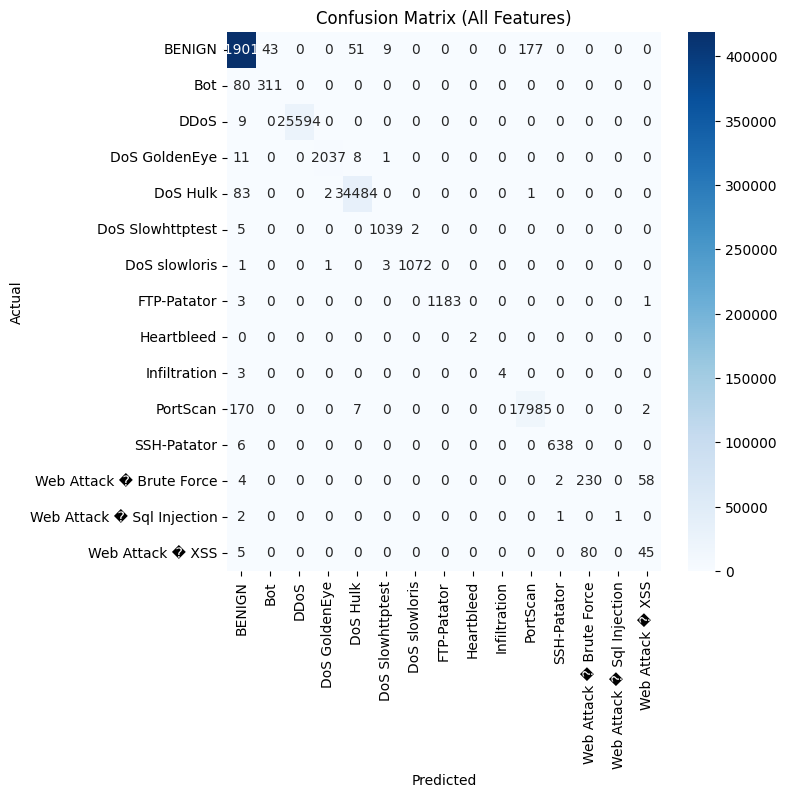

start !!!

----- Training Models for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Max Voting Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.9895931001262703
Precision: 0.9896340457530726
Recall: 0.9895931001262703
F1 Score: 0.9887275065088015


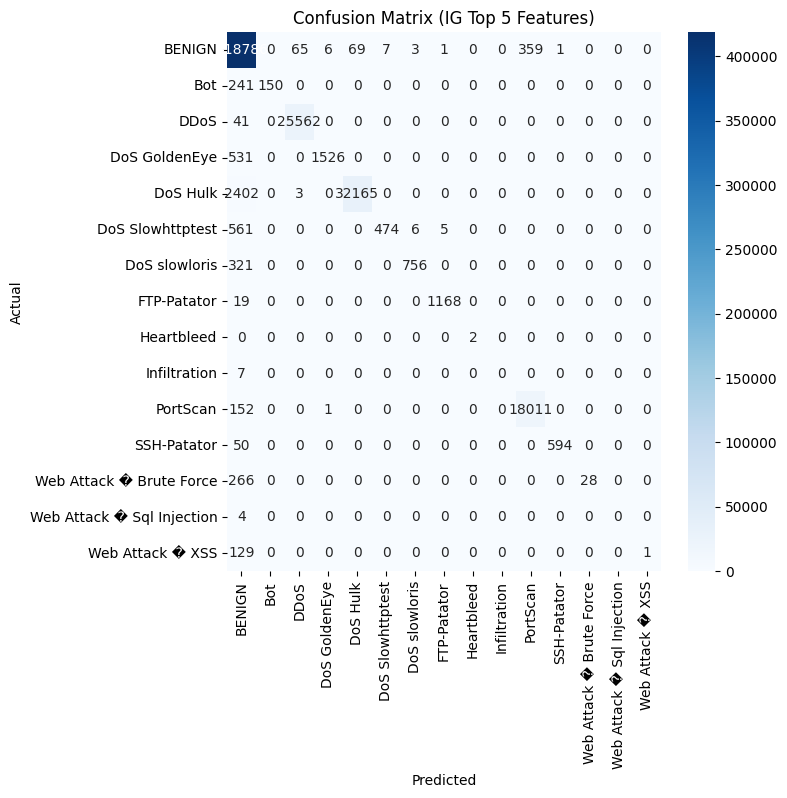

start !!!

----- Training Models for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Max Voting Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.9896922134584012
Precision: 0.989741014872799
Recall: 0.9896922134584012
F1 Score: 0.9888449526205056


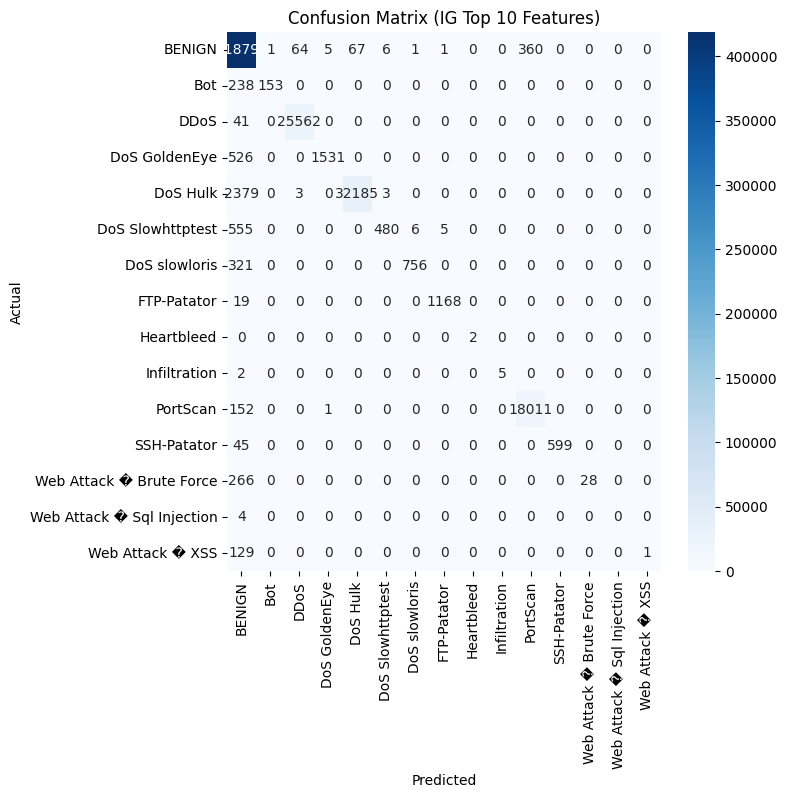

start !!!

----- Training Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Max Voting Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9629157556499555
Precision: 0.961598684949013
Recall: 0.9629157556499555
F1 Score: 0.9620748116877121


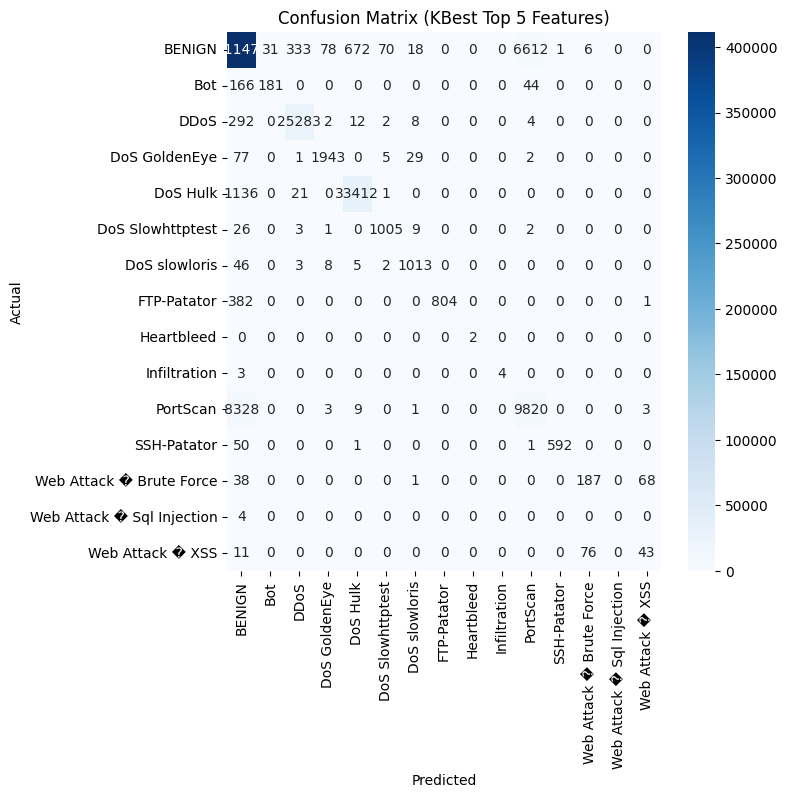

start !!!

----- Training Models for KBest Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Max Voting Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.996610324041128
Precision: 0.9965299148505647
Recall: 0.996610324041128
F1 Score: 0.9965266748239014


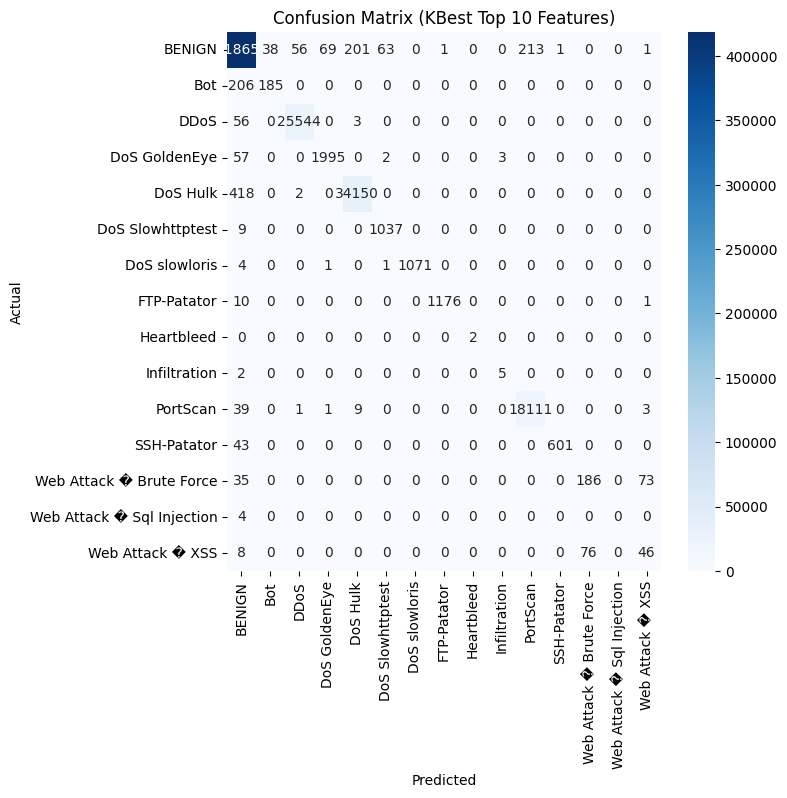

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import time
import sys
from sklearn.ensemble import VotingClassifier

sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix

# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print ('start !!!')
    print(f"\n----- Training Models for {name} -----")

    start_time = time.time()

    model1 = DecisionTreeClassifier()
    model2 = KNeighborsClassifier(n_neighbors=5)
    model3 = RandomForestClassifier()

    start_time = time.time()

    vot_model = VotingClassifier( estimators=[('DT', model1), ('KNN', model2), ('RF', model3)], voting='hard')
    vot_model.fit(X_tr, y_train)

    train_end_time = time.time()

    final_class_pred_enc = vot_model.predict(X_te)

    pred_end_time = time.time()


    metrics = evaluate_model(y_test, final_class_pred_enc, f"Max Voting Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, final_class_pred_enc, le.classes_, f"Confusion Matrix ({name})")


In [ ]:
# ---------------------------- Summary and Save Results ----------------------------

import pandas as pd 
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Max_voting_ensemble_classifier_evaluation_summary.csv", index=False)
